# FEATURE ENGINEERING

### CHECKING CORRELATION BETWEEN VARIABLES

**Values here are engineered for the purpose of predicting prices therefore, we have to tailor our features and pick the ones that would adequately aid in our prediction model.**

In [1]:
import pandas as pd

car = pd.read_csv('cleanead_car_price.csv')
car.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-diesel,fuel-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


In [2]:
car.dtypes

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
horsepower-binned     object
fuel-diesel            int64
fuel-gas               int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object

We have 19 continuous value that is (int64 or float64) and we have 10 categorical values that is (objects) now we can look through the table to know what value has strong correlation with our dependent variable ("Prices")<br><br>We know that the closer the values are to **1 or -1** the **stronger** the correlation and that farther the value from **1 or -1** and the closer the value to **0** the **weaker** the correlation of the value

In [3]:
# Going through the numerical values first.

car.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-diesel,fuel-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139987,-0.007654,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029846,0.055299,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493234,0.157851,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608963,0.123830,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544884,0.188796,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180417,-0.061156,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644055,0.167357,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572585,0.205549,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139987,-0.029846,0.493234,0.608963,0.544884,0.180417,0.644055,0.572585,1.000000,-0.055390,0.001260,0.566906,-0.267357,-0.582051,-0.591330,0.543155,0.054452,-0.054452,-0.227807,0.227807
stroke,-0.007654,0.055299,0.157851,0.123830,0.188796,-0.061156,0.167357,0.205549,-0.055390,1.000000,0.187816,0.098175,-0.063027,-0.034336,-0.034962,0.082262,0.240967,-0.240967,-0.218098,0.218098


From the above data we can say that the following numerical variabes have strong correlation with our price column<br>
- wheel-base
- length
- width
- curb-weight
- engine size
- bore
- horsepower
- city-mpg
- highway mpg

and the following have weak correlation with our price column
- Symboling
- normalized-loses
- height
- stroke
- compression ratio
- peak-rpm
- fuel-diesel
- fuel-gas
- aspiration-std
- aspiration-turbo

**But we will do further analysis to pick which best suits our prediction model**

We have been able to check the correlation between our features and our target, but we will go further and plot regression lines too visualize the level of correlation between the feature and the target.

**So we import matplotlib and seaborn for visualization**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# After importing the libraries we will begin our plots.
# We will first start

<AxesSubplot:xlabel='wheel-base', ylabel='price'>

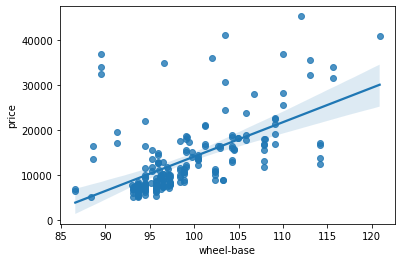

In [5]:
# First the wheelbase column
sns.regplot(x='wheel-base', y='price', data=car)

<AxesSubplot:xlabel='length', ylabel='price'>

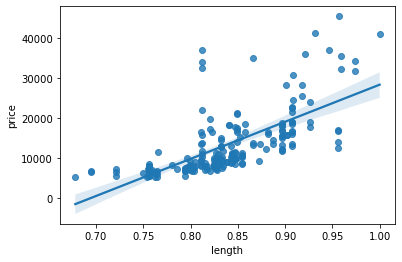

In [6]:
# Second the length

sns.regplot(x='length', y='price', data=car)

<AxesSubplot:xlabel='width', ylabel='price'>

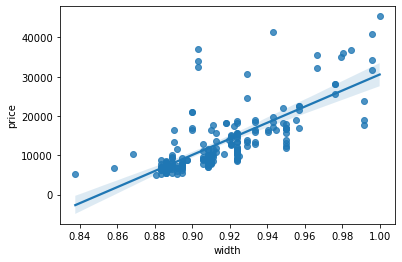

In [7]:
# Third the width

sns.regplot(x='width', y='price', data=car)


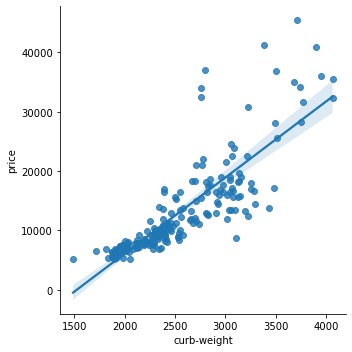

In [8]:
# Fourth the curb-weight

sns.lmplot(x='curb-weight', y='price', data=car)

<AxesSubplot:xlabel='engine-size', ylabel='price'>

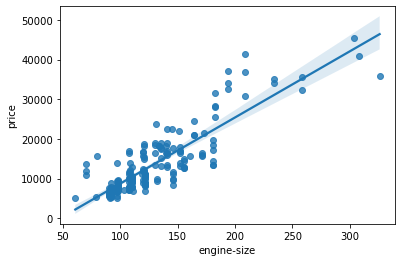

In [9]:
# Fifth the engine-size

sns.regplot(x='engine-size', y='price', data=car)

<AxesSubplot:xlabel='bore', ylabel='price'>

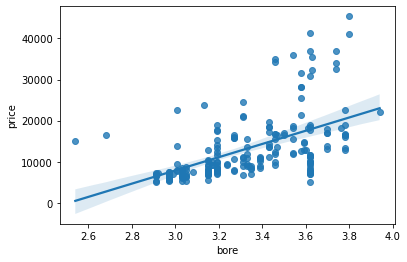

In [10]:
# Sixth the bore

sns.regplot(x='bore', y='price', data=car)

<AxesSubplot:xlabel='horsepower', ylabel='price'>

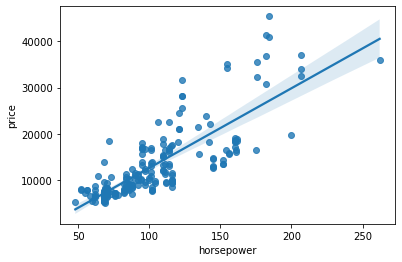

In [11]:
# Seventh the horsepower

sns.regplot(x='horsepower', y='price', data=car)

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

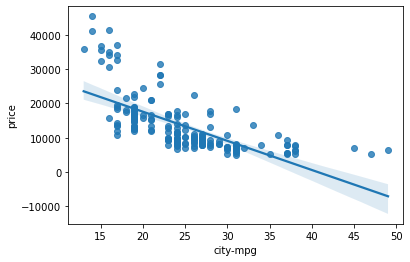

In [12]:
# Eight the city-mpg

sns.regplot(x='city-mpg', y='price', data=car)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

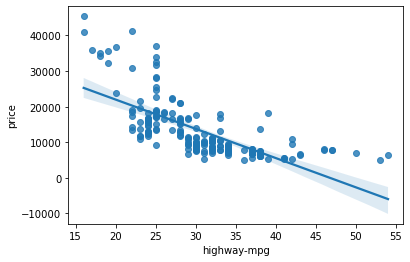

In [13]:
# Ninth highway-mpg

sns.regplot(x='highway-mpg', y='price', data=car)

based on the above regression plots, we can see that some of the above categorical values are perfect for our prediction model, while some are okay but not okay enough, so for the prediction we will be working with the following numerical variables;
- wheel-base
- length
- width
- curb-weight
- engine size
- bore
- horsepower
- city-mpg
- highway mpg

In [14]:
# Going through the categorical values

car.describe(include=[object])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


<AxesSubplot:xlabel='make', ylabel='price'>

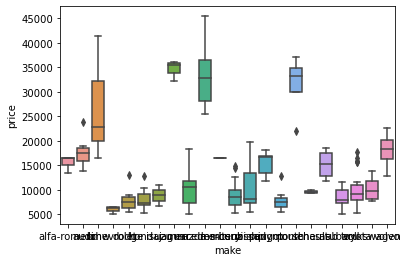

In [15]:
sns.boxplot(x='make', y='price', data=car)

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

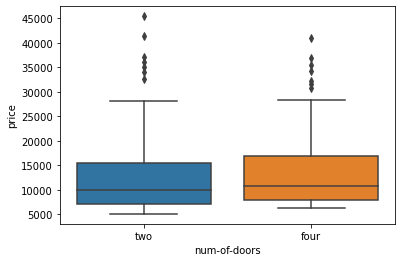

In [16]:
sns.boxplot(x='num-of-doors', y='price', data=car)

<AxesSubplot:xlabel='body-style', ylabel='price'>

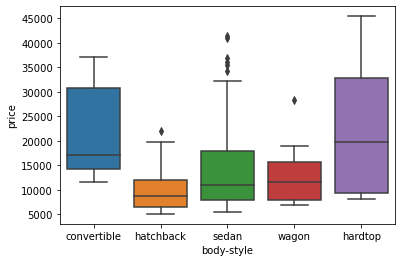

In [17]:
sns.boxplot(x='body-style', y='price', data=car)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

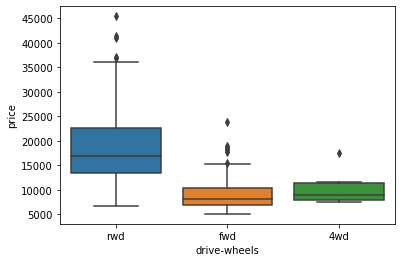

In [18]:
sns.boxplot(x='drive-wheels', y='price', data=car)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

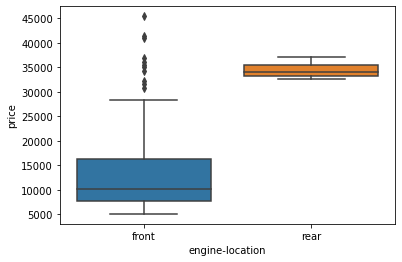

In [19]:
sns.boxplot(x='engine-location', y='price', data=car)

<AxesSubplot:xlabel='engine-type', ylabel='price'>

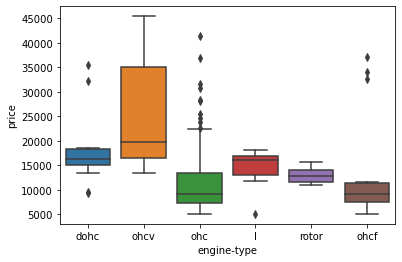

In [20]:
sns.boxplot(x='engine-type', y='price', data=car)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

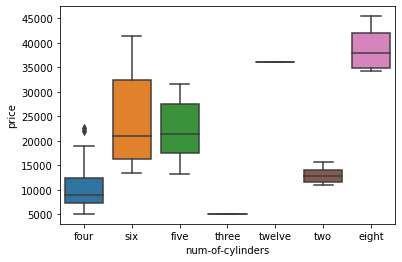

In [21]:
sns.boxplot(x='num-of-cylinders', y='price', data=car)

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

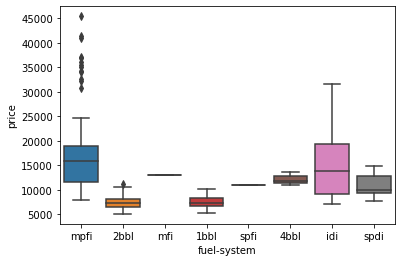

In [22]:
sns.boxplot(x='fuel-system', y='price', data=car)

<AxesSubplot:xlabel='horsepower-binned', ylabel='price'>

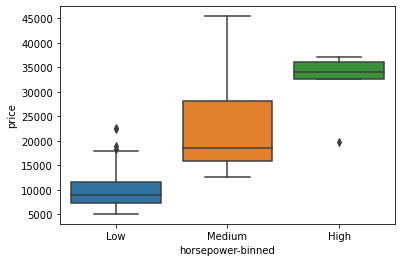

In [23]:
sns.boxplot(x='horsepower-binned', y='price', data=car)

Based on the above boxplots we can see that some of the categorical data are closely packed and have a significant overlap and therefore would not be good predictors of 'price', the categorical values that can work for the prediction model are:<br>
<ul>
    <li> drive-wheels </li>
    <li> engine location </li>
</ul>
we will do further analysis on them by <b>getting the counts of each values</b> because they are categorical values so we have to check it to understand the distribution of the values.

In [24]:
car['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [25]:
car['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

Looking at the data above, we can see that the <b>'drive-wheels'</b> dataframe series are not particularly skewed they are distributed somewhat evenly
compared to the <b>'engine-location'</b> dataframe series the values if plotted will be skewed

<AxesSubplot:xlabel='engine-location', ylabel='Count'>

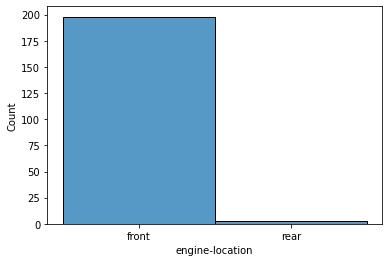

In [26]:
sns.histplot(car['engine-location'])

Looking at the above plot there are only two values (front and rear) and this graph is skewed having values (198 and 3) respectively and it will affect our final product because we will not be able to draw meaningful infomation about the engine location<br><br>
Going through the notebook somewhere at the begining of the notebook I used a pandas library function ( .corr() ), this function is the <b>Pearsons correlation</b><br><br>

The <b>Pearsons correlation function ( .corr() )</b> returns 2 values that is <b>the Pearsons correlation coefficient</b> and <b>the P_value</b><br><br>
<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

to obtain the information we can use the 'stats' module from the 'scipy' library

In [27]:
from scipy import stats

We will be calculating the Pearsons Correlation Coefficient of the numerical values of the already determined features just for confirmation<br><br>


- wheel-base
- length
- width
- curb-weight
- engine-size
- bore
- horsepower
- city-mpg
- highway-mpg

### wheel-base vs price

In [28]:
#                                          features column    target 
pearson_coef, p_value = stats.pearsonr(car['wheel-base'], car['price'])
print("The Pearson Correlation Coefficient of 'wheel-base' is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient of 'wheel-base' is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


### length vs price

In [29]:
pearson_coef, p_value = stats.pearsonr(car['length'], car['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P = 8.016477466158986e-30


### curb-weight vs price

In [30]:
pearson_coef, p_value = stats.pearsonr(car['curb-weight'], car['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P = 2.1895772388936914e-53


### engine-size vs price

In [31]:
pearson_coef, p_value = stats.pearsonr(car['engine-size'], car['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


### bore vs price

In [32]:
pearson_coef, p_value = stats.pearsonr(car['bore'], car['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5431549770315167  with a P-value of P = 8.049696658364877e-17


## horsepower vs price

In [33]:
pearson_coef, p_value = stats.pearsonr(car['horsepower'], car['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P = 6.273536270650504e-48


### city-mpg vs price

In [34]:
pearson_coef, p_value = stats.pearsonr(car['city-mpg'], car['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P = 2.321132065567674e-29


### halfway-mpg vs price

In [35]:
pearson_coef, p_value = stats.pearsonr(car['highway-mpg'], car['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P = 1.7495471144477352e-31


The above features has a statistically significant correlation with the price (target) and will be good for training our model on prediciton, tho the 'bore' column has the weakest correlation compared to all above, it is still statistically significant for the training of our models.

## Using ANOVA

### Analysis of Variance

<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>


<br><br>The only categorical variable we have okay enough for training our model is 'drive-wheels' so we will do an analysis of variance calculation to see how well the feature and contents of the column individually relates with our target

In [36]:
car_drive = car[['drive-wheels','body-style', 'price']]
grouped_test1 = car_drive.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [37]:
# Since the ANOVA fuction works with grouped data we will have to 'groupby' our feature

car_drive = car[['drive-wheels', 'price']].groupby(['drive-wheels'])
car_drive.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [38]:
# ANOVA

f_val, p_val = stats.f_oneway(car_drive.get_group('fwd')['price'], car_drive.get_group('rwd')['price'], car_drive.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


## HIGHLIGHTS OF THIS NOTEBOOK

<ul>
    <li><b>Imported the libraries I needed to complete this work</b>
        <ul>
            <li> Pandas
            <li> Matplotlib
            <li> Numpy
            <li> Scipy
        </ul>
        <br>
    <li><b> The afore-mentioned libraries helped complete tasks</b>
        <ul>
            <li> Importing the dataset I was to work on
            <li> Get the correlation between all columns in the dataset
            <li> Visualize the correlation of numerical values using a 'Linear Regression Line'
            <li> Visualize the correlation of categorical values using box-plots
            <li> Check each feature individually to get a sense of the level of correlation
        </ul>
</ul><br><br>

><b>SUMMARY OF THIS NOTEBOOK</b><br>
> - Got the relationship between all values on the dataset
> - Visualize the values using Linear regression and boxplots
> - Calculated the Pearson's Correlation Coefficient
> - Calculated the ANOVA

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

In [39]:
c = car[['length', 'width','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','wheel-base','bore','drive-wheels','price']]
c

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
0,0.811148,0.890278,2548,130,111,21,27,88.6,3.47,rwd,13495.0
1,0.811148,0.890278,2548,130,111,21,27,88.6,3.47,rwd,16500.0
2,0.822681,0.909722,2823,152,154,19,26,94.5,2.68,rwd,16500.0
3,0.848630,0.919444,2337,109,102,24,30,99.8,3.19,fwd,13950.0
4,0.848630,0.922222,2824,136,115,18,22,99.4,3.19,4wd,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
196,0.907256,0.956944,2952,141,114,23,28,109.1,3.78,rwd,16845.0
197,0.907256,0.955556,3049,141,160,19,25,109.1,3.78,rwd,19045.0
198,0.907256,0.956944,3012,173,134,18,23,109.1,3.58,rwd,21485.0
199,0.907256,0.956944,3217,145,106,26,27,109.1,3.01,rwd,22470.0


In [40]:
c.to_csv("features_car.csv",index=False)

### THANK YOU  FOR VIEWING MY NOTEBOOK